In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
salesDf=pd.read_excel(r'H:\对比Excel,轻松学习Python数据分析数据集\朝阳医院数据集\朝阳医院2018年销售数据.xlsx')
salesDf.head()
# #1，月消费次数
# 2. 月均消费金额
# 3.客单价
# 4.消费趋

,购药时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
0,2018-01-01 星期五,1.616528e+06,236701.0,强力VC银翘片,6.0,82.8,69.00
1,2018-01-02 星期六,1.616528e+06,236701.0,清热解毒口服液,1.0,28.0,24.64
2,2018-01-06 星期三,1.260283e+07,236701.0,感康,2.0,16.8,15.00
3,2018-01-11 星期一,1.007034e+10,236701.0,三九感冒灵,1.0,28.0,28.00
4,2018-01-15 星期五,1.015543e+08,236701.0,三九感冒灵,8.0,224.0,208.00


In [3]:
#查看导入数据的基本情况
#查看导入的数据的类型
type(salesDf)

pandas.core.frame.DataFrame

In [4]:
salesDf.dtypes

购药时间     object
社保卡号    float64
商品编码    float64
商品名称     object
销售数量    float64
应收金额    float64
实收金额    float64
dtype: object

In [5]:
salesDf.shape

(6578, 7)

In [9]:
#查看列名
salesDf.columns

Index(['购药时间', '社保卡号', '商品编码', '商品名称', '销售数量', '应收金额', '实收金额'], dtype='object')

In [10]:
salesDf.index

RangeIndex(start=0, stop=6578, step=1)

In [11]:
#查看每列数据的统数目
salesDf.count()

购药时间    6576
社保卡号    6576
商品编码    6577
商品名称    6577
销售数量    6577
应收金额    6577
实收金额    6577
dtype: int64

In [12]:
#查看前五列
salesDf.head()

,购药时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
0,2018-01-01 星期五,1.616528e+06,236701.0,强力VC银翘片,6.0,82.8,69.00
1,2018-01-02 星期六,1.616528e+06,236701.0,清热解毒口服液,1.0,28.0,24.64
2,2018-01-06 星期三,1.260283e+07,236701.0,感康,2.0,16.8,15.00
3,2018-01-11 星期一,1.007034e+10,236701.0,三九感冒灵,1.0,28.0,28.00
4,2018-01-15 星期五,1.015543e+08,236701.0,三九感冒灵,8.0,224.0,208.00


In [15]:
#购药时间->销售时间
nameChangeDict = {'购药时间':'销售时间'}
#参数inplace=True表示覆盖元数据集
salesDf.rename(columns = nameChangeDict,inplace=True)
salesDf.head()

,销售时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
0,2018-01-01 星期五,1.616528e+06,236701.0,强力VC银翘片,6.0,82.8,69.00
1,2018-01-02 星期六,1.616528e+06,236701.0,清热解毒口服液,1.0,28.0,24.64
2,2018-01-06 星期三,1.260283e+07,236701.0,感康,2.0,16.8,15.00
3,2018-01-11 星期一,1.007034e+10,236701.0,三九感冒灵,1.0,28.0,28.00
4,2018-01-15 星期五,1.015543e+08,236701.0,三九感冒灵,8.0,224.0,208.00


In [20]:
#首先查看一下哪些项目存在缺失值
salesDf.isnull().any()
#df.isnull().any()则会判断哪些”列”存在缺失值
#可以看出 每一个列 都存在缺失值

销售时间    True
社保卡号    True
商品编码    True
商品名称    True
销售数量    True
应收金额    True
实收金额    True
dtype: bool

In [25]:
salesDf[salesDf.isnull().values==True]
#可以只显示存在缺失值的行列，清楚的确定缺失值的位置。

,销售时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
6570,NaN,11778628.0,2367011.0,高特灵,10.0,56.0,56.00
6571,2018-04-25 星期二,NaN,2367011.0,高特灵,2.0,11.2,9.86
6574,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6574,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6574,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6574,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6574,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6574,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6574,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#查看一下缺失值的数量#通常可以用isnull函数来查找缺失值
salesDf[salesDf[['销售时间','社保卡号']].isnull().values == True]

,销售时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
6570,NaN,11778628.0,2367011.0,高特灵,10.0,56.0,56.00
6571,2018-04-25 星期二,NaN,2367011.0,高特灵,2.0,11.2,9.86
6574,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6574,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
#序号6574因为销售时间和社保卡号都缺失，所以会出现两次。所以我们要去掉一下重复数据。
naDf = salesDf[salesDf[['销售时间','社保卡号']].isnull().values == True].drop_duplicates()
naDf

,销售时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
6570,NaN,11778628.0,2367011.0,高特灵,10.0,56.0,56.00
6571,2018-04-25 星期二,NaN,2367011.0,高特灵,2.0,11.2,9.86
6574,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#缺失数据行数
naDf.shape[0]

3

In [31]:
#含有销售时间和社保卡号的缺失数据删除
salesDf = salesDf.dropna(subset=['销售时间','社保卡号'],how = 'any')
#删除后数据集规模显示
salesDf.shape

(6575, 7)

In [33]:
#重命名行名（index）：排序后的列索引值是之前的行号，需要修改成从0到N按顺序的索引值
salesDf=salesDf.reset_index(drop=True)
salesDf.head()

,销售时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
0,2018-01-01 星期五,1.616528e+06,236701.0,强力VC银翘片,6.0,82.8,69.00
1,2018-01-02 星期六,1.616528e+06,236701.0,清热解毒口服液,1.0,28.0,24.64
2,2018-01-06 星期三,1.260283e+07,236701.0,感康,2.0,16.8,15.00
3,2018-01-11 星期一,1.007034e+10,236701.0,三九感冒灵,1.0,28.0,28.00
4,2018-01-15 星期五,1.015543e+08,236701.0,三九感冒灵,8.0,224.0,208.00


In [36]:
salesDf.dtypes


销售时间     object
社保卡号    float64
商品编码    float64
商品名称     object
销售数量    float64
应收金额    float64
实收金额    float64
dtype: object

In [37]:
salesDf['销售数量'] = salesDf['销售数量'].astype('float')
salesDf['应收金额'] = salesDf['应收金额'].astype('float')
salesDf['实收金额'] = salesDf['实收金额'].astype('float')
print('转换后的数据类型：\n',salesDf.dtypes)

转换后的数据类型：
 销售时间     object
社保卡号    float64
商品编码    float64
商品名称     object
销售数量    float64
应收金额    float64
实收金额    float64
dtype: object


In [42]:
#日期转换
def dateChange(dateSer):
    dateList = []
    for i in dateSer:
        #例如2018-01-01 星期五，分割后为：2018-01-01
        str = i.split(' ')[0]
        dateList.append(str)
    dateChangeSer = pd.Series(dateList)
    return dateChangeSer
dateChangeSer = dateChange(salesDf['销售时间'])
dateChangeSer.head()

0    2018-01-01
1    2018-01-02
2    2018-01-06
3    2018-01-11
4    2018-01-15
dtype: object

In [43]:
salesDf['销售时间'] = dateChangeSer
salesDf.head()

,销售时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
0,2018-01-01,1.616528e+06,236701.0,强力VC银翘片,6.0,82.8,69.00
1,2018-01-02,1.616528e+06,236701.0,清热解毒口服液,1.0,28.0,24.64
2,2018-01-06,1.260283e+07,236701.0,感康,2.0,16.8,15.00
3,2018-01-11,1.007034e+10,236701.0,三九感冒灵,1.0,28.0,28.00
4,2018-01-15,1.015543e+08,236701.0,三九感冒灵,8.0,224.0,208.00


In [44]:
salesDf['销售时间'].isnull().any()

False

In [45]:
salesDf.dtypes

销售时间     object
社保卡号    float64
商品编码    float64
商品名称     object
销售数量    float64
应收金额    float64
实收金额    float64
dtype: object

In [49]:
dateSer=pd.to_datetime(salesDf['销售时间'], format = '%Y-%m-%d', errors='coerce')
dateSer.head()

0   2018-01-01
1   2018-01-02
2   2018-01-06
3   2018-01-11
4   2018-01-15
Name: 销售时间, dtype: datetime64[ns]

In [50]:
dateSer.isnull().any()

True

In [52]:
compareDf = pd.DataFrame(dateSer[dateSer.isnull()],salesDf[dateSer.isnull()]['销售时间'])
compareDf.head()

,销售时间
销售时间,
2018-02-29,NaT
2018-02-29,NaT
2018-02-29,NaT
2018-02-29,NaT
2018-02-29,NaT


In [54]:
salesDf['销售时间'] = dateSer
salesDf.dtypes

销售时间    datetime64[ns]
社保卡号           float64
商品编码           float64
商品名称            object
销售数量           float64
应收金额           float64
实收金额           float64
dtype: object

In [55]:
salesDf=salesDf.dropna(subset=['销售时间','社保卡号'],how='any')
salesDf.shape

(6552, 7)

In [58]:
salesDf=salesDf.reset_index(drop=True)
salesDf.head()


,销售时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
0,2018-01-01,1.616528e+06,236701.0,强力VC银翘片,6.0,82.8,69.00
1,2018-01-02,1.616528e+06,236701.0,清热解毒口服液,1.0,28.0,24.64
2,2018-01-06,1.260283e+07,236701.0,感康,2.0,16.8,15.00
3,2018-01-11,1.007034e+10,236701.0,三九感冒灵,1.0,28.0,28.00
4,2018-01-15,1.015543e+08,236701.0,三九感冒灵,8.0,224.0,208.00


In [61]:
#按销售时间排序
salesDf = salesDf.sort_values(by='销售时间')
#再次更新一下序号
salesDf = salesDf.reset_index(drop = True)
salesDf.head()

,销售时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
0,2018-01-01,1616528.0,236701.0,强力VC银翘片,6.0,82.8,69.0
1,2018-01-01,13401428.0,861405.0,苯磺酸氨氯地平片(络活喜),1.0,34.5,31.0
2,2018-01-01,107891628.0,868107.0,厄贝沙坦氢氯噻嗪片(安博诺),1.0,38.8,35.0
3,2018-01-01,11743428.0,861405.0,苯磺酸氨氯地平片(络活喜),1.0,34.5,31.0
4,2018-01-01,11811728.0,861456.0,酒石酸美托洛尔片(倍他乐克),1.0,7.0,6.3


In [62]:
salesDf.describe()

,社保卡号,商品编码,销售数量,应收金额,实收金额
count,6.552000e+03,6.552000e+03,6552.000000,6552.00000,6552.000000
mean,6.095150e+09,1.015031e+06,2.384158,50.43025,46.266972
std,4.888430e+09,5.119572e+05,2.374754,87.68075,81.043956
min,1.616528e+06,2.367010e+05,-10.000000,-374.00000,-374.000000
25%,1.014290e+08,8.614560e+05,1.000000,14.00000,12.320000
50%,1.001650e+10,8.615070e+05,2.000000,28.00000,26.500000
75%,1.004898e+10,8.687840e+05,2.000000,59.60000,53.000000
max,1.283612e+10,2.367012e+06,50.000000,2950.00000,2650.000000


In [65]:
#删除异常值：通过条件判断筛选出数据#查询条件
querySer=salesDf.loc[:,'销售数量']>0
#应用查询条件
print('删除异常值前：',salesDf.shape)
salesDf=salesDf.loc[querySer,:]
print('删除异常值后：',salesDf.shape)

删除异常值前： (6552, 7)
删除异常值后： (6509, 7)


In [67]:
#总消费次数计算
kpDf = salesDf.drop_duplicates(subset=['销售时间','社保卡号'])
total = kpDf.shape[0]
print('总消费次数为：',total)

总消费次数为： 5345


In [68]:
#月份数计算
startDay = salesDf.loc[0,'销售时间']
print('开始日期:',startDay)
endDay = salesDf.loc[salesDf.shape[0]-1,'销售时间']
print('结束日期:',endDay)
monthCount = (endDay - startDay).days//30
print('月份数:',monthCount)

开始日期: 2018-01-01 00:00:00
结束日期: 2018-07-18 00:00:00
月份数: 6


In [71]:
#业务指标1:月均消费次数=总消费次数 / 月份数
kpi1 = total / monthCount
print('业务指标1：月均消费次数=',kpi1)


业务指标1：月均消费次数= 890.8333333333334


In [72]:
totalMoney = salesDf['实收金额'].sum()
kpi2 = totalMoney / monthCount
print('业务指标2：月平均消费金额=',kpi2)

业务指标2：月平均消费金额= 50672.494999999995


In [73]:
kpi3 = kpi2 / kpi1
print('业务指标3：客单价=',kpi3)

业务指标3：客单价= 56.88212722170252


In [74]:
#在进行操作之前，先把数据复制到另一个数据框中，防止对之前清洗后的数据框造成影响
groupDf=salesDf
#第1步：重命名行名（index）为销售时间所在列的值
groupDf.index=groupDf['销售时间']
groupDf.head()

,销售时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
销售时间,,,,,,,
2018-01-01,2018-01-01,1616528.0,236701.0,强力VC银翘片,6.0,82.8,69.0
2018-01-01,2018-01-01,13401428.0,861405.0,苯磺酸氨氯地平片(络活喜),1.0,34.5,31.0
2018-01-01,2018-01-01,107891628.0,868107.0,厄贝沙坦氢氯噻嗪片(安博诺),1.0,38.8,35.0
2018-01-01,2018-01-01,11743428.0,861405.0,苯磺酸氨氯地平片(络活喜),1.0,34.5,31.0
2018-01-01,2018-01-01,11811728.0,861456.0,酒石酸美托洛尔片(倍他乐克),1.0,7.0,6.3


In [77]:
#第2步：分组
gb=groupDf.groupby(groupDf.index.month)
#第3步：应用函数，计算每个月的消费总额
unthDf=gb.sum()
unthDf

,社保卡号,商品编码,销售数量,应收金额,实收金额
销售时间,,,,,
1,6.257155e+12,1.073329e+09,2527.0,53561.6,49461.19
2,4.702493e+12,7.438598e+08,1858.0,42028.8,38790.38
3,6.124761e+12,1.007946e+09,2225.0,45318.0,41597.51
4,7.620230e+12,1.226705e+09,3010.0,54324.3,48812.70
5,5.898556e+12,1.004573e+09,2225.0,51263.4,46925.27
6,5.421001e+12,9.289637e+08,2328.0,52300.8,48327.70
7,3.608900e+12,6.259256e+08,1483.0,32568.0,30120.22


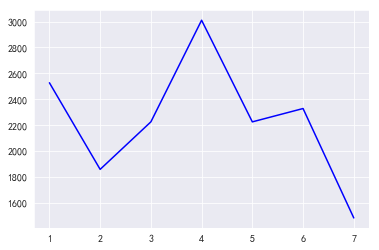

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})
import matplotlib.pyplot as plt
%matplotlib inline
#绘制销售数量图
plt.plot(unthDf['销售数量'],color = 'b')